In [88]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import calinski_harabaz_score as ch
# %cd ..
from metrics import *

In [64]:
def transform(data):
    pca = PCA()
    pca.fit(data)
    pca_data = pca.transform(data)
    
    var = pca.explained_variance_ratio_
    columns = [f'PC{x}' for x in range(1, len(var) + 1)]
    
    pca_df = pd.DataFrame(pca_data, columns=columns)
    
    X = pca_df[['PC1', 'PC2']].values
    return X

In [106]:
def calc_metrics(X, labels):
    return [metric(X, labels) for metric in [sil, ch, dunn, os]]

## Country dataset

In [63]:
df = pd.read_csv("../data_raw/Country-data.csv").drop(['country'], axis=1)
df.head()

FileNotFoundError: File b'../data/Country-data.csv' does not exist

In [33]:
# df.to_csv("../prepared_data/country.csv")

In [85]:
X = transform(df)
kmeans = KMeans(4, n_init=1)
labels = kmeans.fit_predict(X)

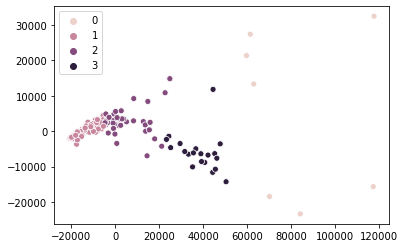

In [86]:
sns.scatterplot(X[:, 0], X[:, 1], hue=labels)

In [87]:
calc_metrics(X, labels)

[0.61095419544730301,
 382.47779979753886,
 0.024992523980763362,
 -8.878897381726437e-05]

## Iris Dataset

In [91]:
X, y = datasets.load_iris(True)

In [96]:
labels = KMeans(3).fit_predict(X)

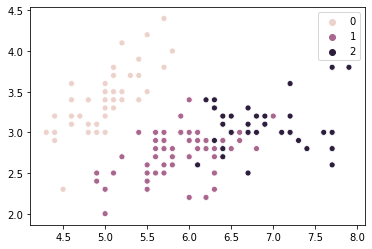

In [104]:
sns.scatterplot(X[:, 0], X[:, 1], hue=labels)

In [107]:
calc_metrics(X, labels)

[0.55259194452136762,
 560.39992424664024,
 0.098807393328080986,
 -1.4424894238882562]

## Synthetic datasets

In [118]:
blobs2, _ = datasets.make_blobs(200, centers=2, random_state=42)

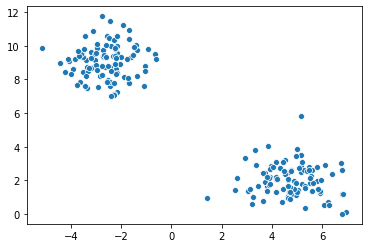

In [119]:
sns.scatterplot(blobs2[:, 0], blobs2[:, 1])

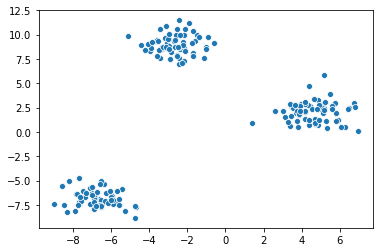

In [126]:
blobs3, _ = datasets.make_blobs(200, centers=3, random_state=42)
sns.scatterplot(blobs3[:, 0], blobs3[:, 1])

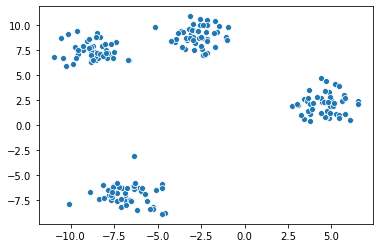

In [127]:
blobs4, _ = datasets.make_blobs(200, centers=4, random_state=42)
sns.scatterplot(blobs4[:, 0], blobs4[:, 1])

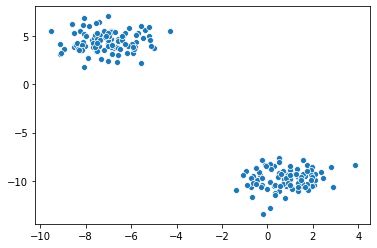

In [144]:
blobs3d2, _ = datasets.make_blobs(200, n_features=3, centers=2, random_state=12)
sns.scatterplot(blobs3d2[:, 0], blobs3d2[:, 1])

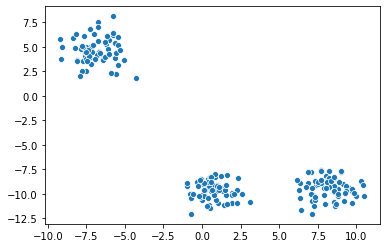

In [143]:
blobs3d3, _ = datasets.make_blobs(200, n_features=3, centers=3, random_state=12)
sns.scatterplot(blobs3d3[:, 0], blobs3d3[:, 1])